In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams["figure.figsize"] = [16,9]

## Air Passengers Dataset

### Sliding Window

The use of prior time steps to predict the next time step is called the sliding window method. For short, it may be called the window method in some literature.

In statistics and time series analysis, this is called a lag or lag method.

The number of previous time steps is called the window width or size of the lag. This sliding window is the basis for how we can turn any time series dataset into a supervised learning problem.

In the above problem, we cannot use the first row because it has NaN.

Sliding Window With Multiple Steps
The number of time steps ahead to be forecasted is important. In the example above, we had used one step. There can be multiple steps as well:

1. One-step Forecast: This is where the next time step (t+1) is predicted.

2. Multi-step Forecast: This is where two or more future time steps are to be predicted.

In [2]:
series = pd.read_csv("Air_passenger.csv", header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t','t+1']
print(dataframe.head(5))

       t  t+1
0    NaN  112
1  112.0  118
2  118.0  132
3  132.0  129
4  129.0  121


### Rolling Window

After we have understood lag and sliding window, it is time to focus on rolling window statistics which will be useful for the analysis. One thing that we can do with our data is that we can add a summary of values at previous steps. The summaries could be mean, standard deviation, variation, edian, etc. The most useful will be the rolling mean.

We can calculate the mean of the current and previous values and use that to predict the next value.

In [3]:
series = pd.read_csv("Air_passenger.csv", header=0, index_col=0,
parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)  t+1
0          NaN  112
1          NaN  118
2        115.0  132
3        125.0  129
4        130.5  121


### Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation). A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1.

The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation. This is similar to the pearson correlation we try to find in our supervised learning problem.

Additionally, Autocorrelation plots are also a commonly-used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.

There are several autocorrelation coefficients, corresponding to each panel in the lag plot. For example,
r1 measures the relationship between y(t) and y(t−1),r2 measures the relationship between y(t) and y(t-2), and so on.

How can the plot be used?

A plot can be created to help better understand how this relationship changes over the lag. This type of plot is called an autocorrelation plot. A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in size. So the ACF of trended time series tend to have positive values that slowly decrease as the lags increase.

When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal frequency) than for other lags. It will resemble a sin curve.

A data with both trend and seasonality will show both of these effects. The ACF will decrease over the period of time and the curve will pulse while decreasing.

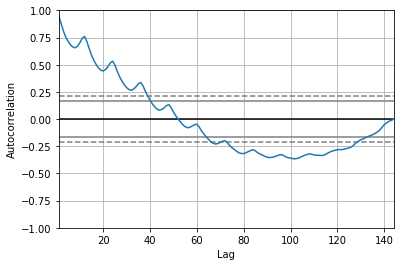

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

The plot above shows strong correlation, a positive relationship between the variable and the initial few values of lags. If this plot was a sin curve, it will indicate strong seasonality in the data. The graph above clearly shows trend in the data.

### Stationarity of Time-Series

A stationary time series is one where the values are not a function of time. Given the way that the random walk is constructed and the results of reviewing the autocorrelation, we know that the observations in a random walk are dependent on time. Therefore we can expect a random walk to be non-stationary. In fact, all random walk processes are non-stationary. Note that not all non-stationary time series are random walks.

Stationarity is an important concept in time series analysis. Most forecasting methods assume that a distribution has stationarity. For example, autocovariance and autocorrelations rely on the assumption of stationarity. An absence of stationarity can cause unexpected or bizarre behaviors. 

1. Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.

2. Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

Models can show different types of stationarity:

**1. Strict stationarity** means that the joint distribution of any moments of any degree (e.g. expected values, variances, third order and higher moments) within the process is never dependent on time. This definition is in practice too strict to be used for any real-life model.

**2. First-order stationarity** series have means that never changes with time. Any other statistics (like variance) can change.

**3. Second-order stationarity (also called weak stationarity) time series** have a constant mean, variance and an autocovariance that doesn’t change with time. Other statistics in the system are free to change over time. This constrained version of strict stationarity is very common.

**4. Trend-stationary models** fluctuate around a deterministic trend (the series mean). These deterministic trends can be linear or quadratic, but the amplitude (height of one oscillation) of the fluctuations neither increases nor decreases across the series.

**5. Difference-stationary models** are models that need one or more differencings to become stationary. 

It can be difficult to tell if a model is stationary or not. Sometimes, it can be useful to look at the graphs and tell whether the series is stationary or not using rolling mean and standard deviation, there are other methods that can be used to determine whether a time-series is stationary or not:

1. Unit root tests (e.g. Augmented Dickey-Fuller (ADF) test or Zivot-Andrews test)

2. A KPSS test (run as a complement to the unit root tests).

3. The Priestley-Subba Rao (PSR) Test or Wavelet-Based Test, which are less common tests based on spectrum analysis.

We will be using Augmented Dickey-Fuller test for analyzing if the time-series is stationary or not. 

To test if our dataset is stationary or not, we will first make a hypothesis:

**H0 or null hypothesis**: The time series is stationary 

**H1 or alternative hypothesis**: The time series is not stationary

Let us test H0 and assume that the time series is stationary and now let's visualize the data and perform the Augmented Dickey Fuller test. 

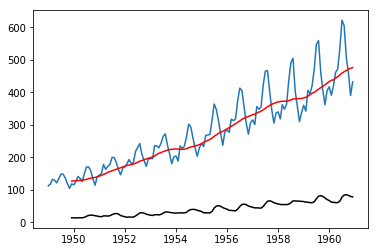

In [5]:
movingaverage=series.rolling(window=12).mean()
movingstd=series.rolling(window=12).std()
plt.plot(series)
plt.plot(movingaverage, color='red')
plt.plot(movingstd, color='black')


We can see that although the standard deviation line is stationary, the moving average line is not stationary. But before rejecting the null hypothesis we will perform Dickey Fuller test as well.

### Augmented Dickey Fuller test

An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample.

We are not interested in the deep technical connotations. We are more concerned about the intuitive understanding behind the ADF test.

The intuition behind the test is that if the series is characterised by a unit root process then the lagged level of the series y(t-1) will provide no relevant information in predicting the change in y(t). In contrast, when the process has no unit root, it is stationary and hence exhibits reversion to the mean - so the lagged level will provide relevant information in predicting the change of the series and the null of a unit root will be rejected.

In [6]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(window=12).mean()
    movingstd= ts.rolling(window=12).std()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.plot(movingstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

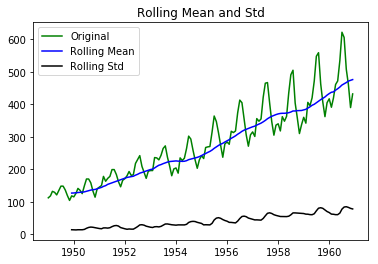

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (0.8153688792060433, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
df_output: 
 Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [7]:
stationarity_check(series)

#### Q. Write about the p-value, test statistic, critical values in detail and how are they important to determine stationarity of a dataset. 
The p-value represents a probability of the error when expecting, that the trend differs from zero (i.e. probability, that there is no time change and the value is based on random fluctuations only).

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

Also, the test statistic and critical value help in determining the stationarity of a time series dataset. When the test statistic is lower than the critical value, you reject the null hypothesis and infer that the time series is stationary. 


#### Q. Write about steps that can be taken to make a time-series stationary. 

The two main reasons for the non-stationarity of the time series is :
1. Trend
2. Seasonality

Therefore we should estimate the trend and seasonality in the series and remove them from the series to get a stationary series.

Two ways of eliminating trend and seasonality is:

1. Differencing – In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity.

2. Decomposition – In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.




#### Q. Perform the analysis done in this week on the mean temperature dataset. Also, write in detail about the insights you found while doing the analysis.


## Mean Temperature Dataset

In [17]:
data=pd.read_csv("testset.csv")
data['datetime'] = pd.to_datetime(data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))
data = data.set_index('datetime',drop=True)
data.index.name = 'datetime'
data = data['2001':]



newdata = data.resample('M').mean().interpolate()
data1=newdata.groupby(newdata.index.year).mean()
newdata['Year'] = newdata.index.year
newdata['Month'] = newdata.index.month
newdata.head()
#data.head()

,Temperature,Year,Month
datetime,,,
2001-01-31,12.568436,2001,1
2001-02-28,18.241270,2001,2
2001-03-31,23.494737,2001,3
2001-04-30,29.781388,2001,4
2001-05-31,33.019526,2001,5


### Sliding Window

In [8]:
# Transforming mean temperature into a 3 step sliding window
temps = DataFrame(newdata.Temperature.values)
dataframe = concat([temps.shift(3), temps], axis=1)
dataframe.columns = ['t','t+3']
print(dataframe.head(5))

           t        t+3
0        NaN  12.568436
1        NaN  18.241270
2        NaN  23.494737
3  12.568436  29.781388
4  18.241270  33.019526


### Rolling window statistics

In [9]:
temps = DataFrame(newdata.Temperature.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)        t+1
0          NaN  12.568436
1          NaN  18.241270
2    15.404853  23.494737
3    20.868003  29.781388
4    26.638063  33.019526


### Autocorrelation Plots

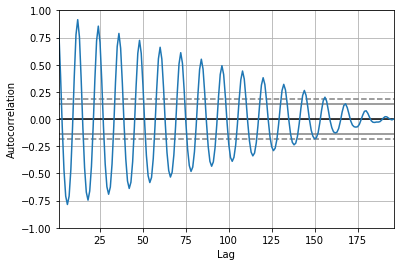

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(newdata['Temperature'])
plt.show()

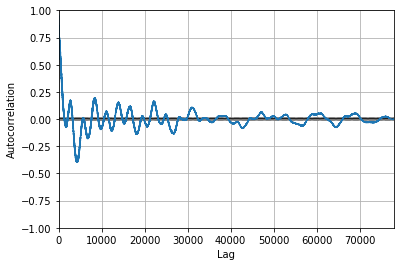

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Temperature'])
plt.show()

The data has both seasonality and trend as the ACF curve decreases over period of time and the curve pulses will decreasing.

### Augmented Dickey Fuller test

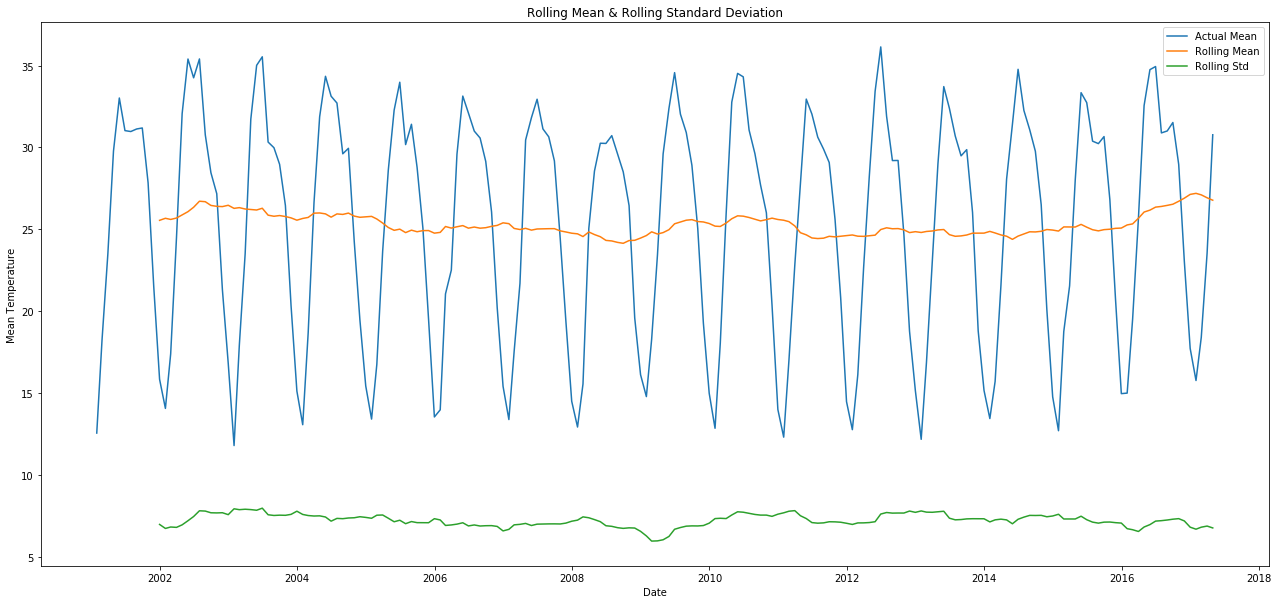

In [22]:
# check rolling mean and rolling standard deviation
rolling_mean = newdata['Temperature'].rolling(12).mean()
rolling_std = newdata['Temperature'].rolling(12).std()
plt.figure(figsize=(22,10))

plt.plot(newdata['Temperature'], label='Actual Mean')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label = 'Rolling Std')
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.legend()
plt.show()

In [16]:
# Perform Augmented Dickey-Fuller test:
print('Augmented Dickey-Fuller test:')
df_test = adfuller(newdata['Temperature'])
print("type of df_test: ",type(df_test))
print("df_test: ",df_test)
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print("df_output: \n",df_output)
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-1.4389824742397026, 0.5634514193560483, 11, 184, {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}, 633.0833503731099)
df_output: 
 Test Statistic                  -1.438982
p-value                          0.563451
#Lags Used                      11.000000
Number of Observations Used    184.000000
dtype: float64
Test Statistic                  -1.438982
p-value                          0.563451
#Lags Used                      11.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


It can be seen that the p value is greater that 0.05 and the test statistic is greater than Critical Values, so we cannot reject the null hypothesis. Therefore the series is a non-stationary Time series.

In [21]:
data = data.fillna(method='pad')

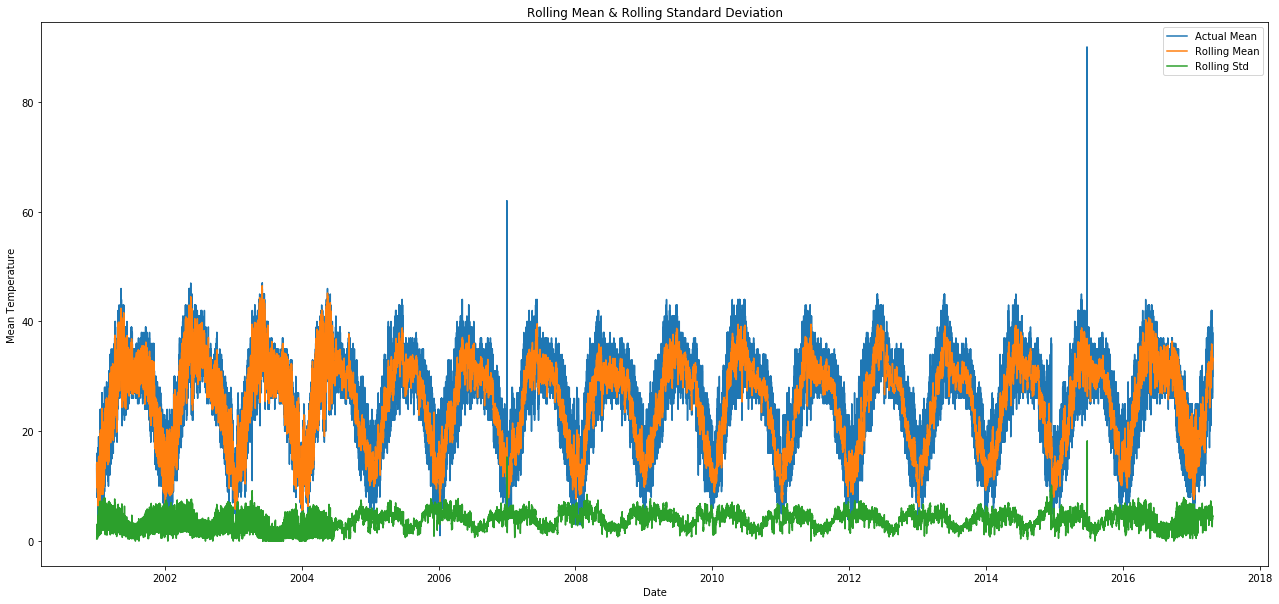

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-7.0151968240508875, 6.760953093280256e-10, 64, 77864, {'1%': -3.430433986381307, '5%': -2.8615771205484366, '10%': -2.56678975798926}, 326142.4083878517)
df_output: 
 Test Statistic                -7.015197e+00
p-value                        6.760953e-10
#Lags Used                     6.400000e+01
Number of Observations Used    7.786400e+04
dtype: float64
Test Statistic                -7.015197e+00
p-value                        6.760953e-10
#Lags Used                     6.400000e+01
Number of Observations Used    7.786400e+04
Critical Value (1%)           -3.430434e+00
Critical Value (5%)           -2.861577e+00
Critical Value (10%)          -2.566790e+00
dtype: float64


In [26]:
# check rolling mean and rolling standard deviation
rolling_mean = data['Temperature'].rolling(12).mean()
rolling_std = data['Temperature'].rolling(12).std()
plt.figure(figsize=(22,10))

plt.plot(data['Temperature'], label='Actual Mean')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label = 'Rolling Std')
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test:
print('Augmented Dickey-Fuller test:')
df_test = adfuller(data['Temperature'])
print("type of df_test: ",type(df_test))
print("df_test: ",df_test)
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print("df_output: \n",df_output)
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)